In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import  roc_auc_score, RocCurveDisplay

2024-05-12 10:01:17.237220: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
#Load the data
folder='/home/unipi/v.vichi3/Desktop/'
X_train, X_val, X_test, y_train, y_val, y_test=np.load(folder+'X_train.npy'), np.load(folder+'X_val.npy'), np.load(folder+'X_test.npy'), np.load(folder+'y_train.npy'), np.load(folder+'y_val.npy'), np.load(folder+'y_test.npy')

In [4]:
#Define the model
model=keras.models.Sequential()
model.add(keras.layers.Dense(units=32,
                             activation="relu",
                             input_dim=X_train.shape[1],
                             kernel_initializer=keras.initializers.RandomNormal(mean=0.0,stddev=0.1)))
model.add(keras.layers.Dense(units=32,
                             activation="sigmoid",
                             kernel_initializer=keras.initializers.RandomNormal(mean=0.0,stddev=0.1)))
model.add(keras.layers.Dense(units=64,
                             activation="sigmoid",
                             kernel_initializer=keras.initializers.RandomNormal(mean=0.0,stddev=0.1)))
model.add(keras.layers.Dense(units=1,
                             activation="relu",
                             kernel_initializer=keras.initializers.RandomNormal(mean=0.0,stddev=0.1)))

2024-05-12 10:01:54.035011: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-05-12 10:01:54.035943: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-05-12 10:01:54.047761: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-12 10:01:54.047780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a4-lab19): /proc/driver/nvidia/version does not exist
2024-05-12 10:01:54.048081: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
20

In [5]:
def r2_score(y_true, y_pred):
    SS_res =  keras.backend.sum(keras.backend.square( y_true-y_pred ))
    SS_tot = keras.backend.sum(keras.backend.square( y_true - keras.backend.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + keras.backend.epsilon()) )

In [6]:
model.load_weights(folder+'nn_model1_1000epochs.h5')

In [7]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error",r2_score]
)

In [8]:
#Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.evaluate(X_test,y_test)

   1/1637 [..............................] - ETA: 4:16 - loss: 8.4898e-05 - mean_absolute_error: 0.0074 - r2_score: 0.9951

2024-05-12 10:02:04.694166: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-05-12 10:02:04.694441: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3892690000 Hz


1637/1637 [==============================] - 1s 253us/step - loss: 1.0265e-04 - mean_absolute_error: 0.0073 - r2_score: 0.9932


[0.00010416494478704408, 0.007332309614866972, 0.9931228756904602]

In [28]:
#Train the model
start=time.time()
history=model.fit(X_train,y_train,
                  validation_data=(X_val,y_val),
                  batch_size=32,
                  epochs=500)
end=time.time()-start
print("Model training time:",end)

Epoch 1/500
18750/18750 [==============================] - 8s 393us/step - loss: 2.4147e-04 - mean_absolute_error: 0.0111 - r2_score: 0.9840 - val_loss: 2.1745e-04 - val_mean_absolute_error: 0.0103 - val_r2_score: 0.9856
Epoch 2/500
18750/18750 [==============================] - 7s 384us/step - loss: 2.4598e-04 - mean_absolute_error: 0.0112 - r2_score: 0.9837 - val_loss: 2.0596e-04 - val_mean_absolute_error: 0.0106 - val_r2_score: 0.9864
Epoch 3/500
18750/18750 [==============================] - 7s 389us/step - loss: 2.3998e-04 - mean_absolute_error: 0.0111 - r2_score: 0.9841 - val_loss: 2.4425e-04 - val_mean_absolute_error: 0.0114 - val_r2_score: 0.9839
Epoch 4/500
18750/18750 [==============================] - 7s 387us/step - loss: 2.3892e-04 - mean_absolute_error: 0.0111 - r2_score: 0.9842 - val_loss: 1.8591e-04 - val_mean_absolute_error: 0.0099 - val_r2_score: 0.9878
Epoch 5/500
18750/18750 [==============================] - 7s 382us/step - loss: 2.3697e-04 - mean_absolute_error: 0

In [29]:
#Save the trained model for future reference (if you want to reload the weights, you have to define a model with 
#the same architecture and then write new_model.load_weights(folder+'nn_model1.h5'))
model.save(folder+'nn_model1_1000epochs.h5')

In [10]:
#We want to understand which are the most important features, i.e. what the NN bases its prediction on
w0 = model.weights[0].numpy()

In [11]:
for i in range(5):
    print(np.linalg.norm(w0[i,:])) #we can see that the most important features are e, a; the angular variables are less important

31.204111
83.64697
0.9327214
0.5049178
0.76805365


In [13]:
plt.plot(history.history['loss'][:250])
plt.plot(history.history['val_loss'][:250])
plt.yscale('log')
plt.title('Model MSE')
plt.xlabel('epoch')
plt.ylabel('mean squared error')
plt.legend(['training','validation'],loc='upper right')
plt.show()

In [17]:
plt.plot(history.history['mean_absolute_error'][:250])
plt.plot(history.history['val_mean_absolute_error'][:250])
plt.yscale('log')
plt.title('Model MAE')
plt.xlabel('epoch')
plt.ylabel('mean absolute error')
plt.legend(['training','validation'],loc='upper right')
plt.show()

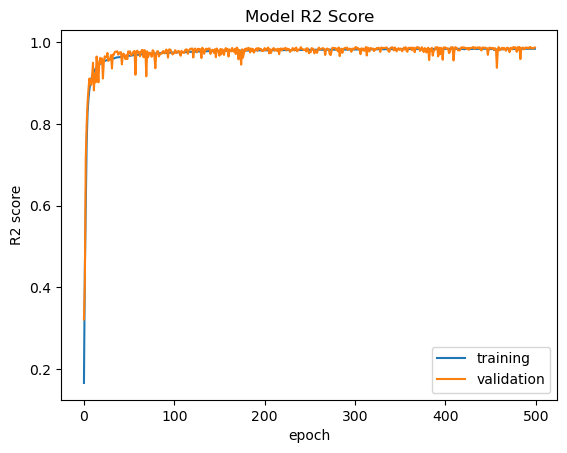

In [20]:
plt.plot(history.history['r2_score'][:250])
plt.plot(history.history['val_r2_score'][:250])
plt.title('Model R2 Score')
plt.xlabel('epoch')
plt.ylabel('R2 score')
plt.legend(['training','validation'],loc='lower right')
plt.show()

In [11]:
#Evaluate the model
model.evaluate(X_test,y_test)

2024-05-11 17:31:21.244068: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-05-11 17:31:21.270182: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3892575000 Hz
2024-05-11 17:31:21.571777: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1637/1637 [==============================] - 3s 632us/step - loss: 1.0265e-04 - mean_absolute_error: 0.0073 - r2_score: 0.9932


[0.00010416490113129839, 0.007332313805818558, 0.9931228160858154]

In [12]:
z=model.predict(X_test)[:,0]

In [13]:
n=10
for el in range(n):
    print(f"true: {y_test[el]} , predicted:  {z[el]} \n")

true: 0.037 , predicted:  0.03611117601394653 

true: 0.1491 , predicted:  0.15110592544078827 

true: 0.2769 , predicted:  0.2777317762374878 

true: 0.2442 , predicted:  0.24263232946395874 

true: 0.4245 , predicted:  0.42558854818344116 

true: 0.2792 , predicted:  0.2945525646209717 

true: 0.4637 , predicted:  0.44423896074295044 

true: 0.1727 , predicted:  0.17932043969631195 

true: 0.1143 , predicted:  0.12211602181196213 

true: 0.2929 , predicted:  0.29719555377960205 



In [14]:
plt.plot(z[:100],'bo',markersize=4)
plt.plot(y_test[:100],'r*',markersize=4)
plt.legend(['predicted','true'],loc='upper left')
plt.show()

In [15]:
#Distribution of the MOID and predicted MOID
num_bins=math.ceil(math.log2(len(y_test))+1) #Sturges rule
plt.hist(y_test,bins=num_bins,color='orange')
plt.hist(z,bins=num_bins,color='blue',histtype='step')
plt.xlabel('MOID')
plt.ylabel('count')
plt.legend(['true','predicted'],loc='upper right')
plt.show()

In [16]:
#Convert the problem into a classification problem: we are going to create an array containing 1 if the MOID is greater than 0.05, and 0 otherwise
#so the positive class is made of the non-hazardous objects
y_test_binary, z_binary = np.zeros_like(y_test),np.zeros_like(z)
for el in range(len(y_test)):
    if (y_test[el]>0.05):
        y_test_binary[el]=1
    if (z[el]>0.05):
        z_binary[el]=1

In [17]:
tp=np.count_nonzero((y_test_binary==1)&(z_binary==1))
tn=np.count_nonzero((y_test_binary==0)&(z_binary==0))
fp=np.count_nonzero((y_test_binary==0)&(z_binary==1))
fn=np.count_nonzero((y_test_binary==1)&(z_binary==0))
print("True positives:", tp)
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)

True positives: 42143
True negatives: 8949
False positives: 541
False negatives: 743


In [18]:
acc=(tp+tn)/len(y_test) #accuracy
p=tp/(tp+fp) #precision
r=tp/(tp+fn) #recall
fpr=fp/(tn+fp) #false positive rate
f1=2*p*r/(p+r) #F1-score
print("Accuracy:", acc)
print("Precision:", p)
print("Recall:", r)
print("False positive rate:", fpr)
print("F1-score:", f1)

Accuracy: 0.9754849549411945
Precision: 0.9873254615312529
Recall: 0.9826749988341184
False positive rate: 0.057007376185458376
F1-score: 0.9849947411475984


In [19]:
roc_auc_score(y_test_binary,z)

0.9962262045277288

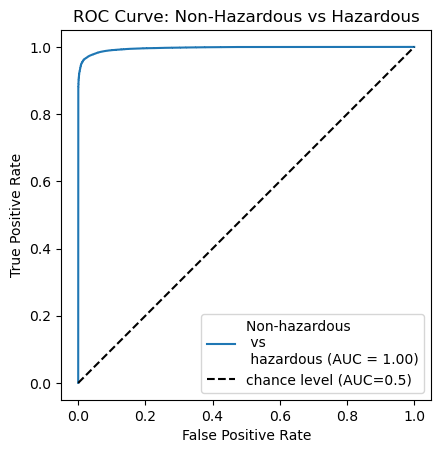

In [20]:
RocCurveDisplay.from_predictions(y_test_binary, z, name="Non-hazardous \n vs \n hazardous")
plt.plot([0,1],[0,1],"k--",label="chance level (AUC=0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Non-Hazardous vs Hazardous")
plt.legend(loc='lower right')
plt.show()

In [21]:
#Now test the model on the real NEOs dataset
import pandas as pd
df=pd.read_csv(folder+'neos_dataframe.csv')
df.head()

Unnamed: 0     spkid pha      H  epoch_mjd       e      a      i      om  \
0           0  20000433   N  10.41      60400  0.2227  1.458  10.83  304.28   
1           1  20000719   N  15.59      60400  0.5469  2.636  11.58  183.85   
2           2  20000887   N  13.88      60400  0.5710  2.472   9.40  110.42   
3           3  20001036   N   9.26      60400  0.5328  2.665  26.69  215.50   
4           4  20001221   N  17.38      60400  0.4352  1.920  11.88  171.31   

        w      ma    moid  
0  178.90  334.73  0.1500  
1  156.22  102.37  0.2010  
2  350.48  289.48  0.0803  
3  132.48  321.69  0.3450  
4   26.68  197.64  0.1080

In [22]:
desired_order=['spkid','pha','H','epoch_mjd','a','e','i','om','w','ma','moid']
df=df[desired_order]
df.head()

spkid pha      H  epoch_mjd      a       e      i      om       w  \
0  20000433   N  10.41      60400  1.458  0.2227  10.83  304.28  178.90   
1  20000719   N  15.59      60400  2.636  0.5469  11.58  183.85  156.22   
2  20000887   N  13.88      60400  2.472  0.5710   9.40  110.42  350.48   
3  20001036   N   9.26      60400  2.665  0.5328  26.69  215.50  132.48   
4  20001221   N  17.38      60400  1.920  0.4352  11.88  171.31   26.68   

       ma    moid  
0  334.73  0.1500  
1  102.37  0.2010  
2  289.48  0.0803  
3  321.69  0.3450  
4  197.64  0.1080

In [23]:
X=df.iloc[:,4:9].to_numpy()
target=df.iloc[:,-1].to_numpy()

In [24]:
model.evaluate(X,target)

1090/1090 [==============================] - 0s 256us/step - loss: 8.2916e-05 - mean_absolute_error: 0.0067 - r2_score: 0.9863


[8.291556150652468e-05, 0.00671815313398838, 0.9862860441207886]

In [25]:
predictions=model.predict(X)[:,0]

In [26]:
n=10
for el in range(n):
    print(f"true: {target[el]} , predicted:  {predictions[el]} \n")

true: 0.15 , predicted:  0.14063376188278198 

true: 0.201 , predicted:  0.20540137588977814 

true: 0.0803 , predicted:  0.06878837943077087 

true: 0.345 , predicted:  0.35209476947784424 

true: 0.108 , predicted:  0.1077912226319313 

true: 0.0339 , predicted:  0.02879190444946289 

true: 0.135 , predicted:  0.12797904014587402 

true: 0.0302 , predicted:  0.017508333548903465 

true: 0.112 , predicted:  0.11151407659053802 

true: 0.0506 , predicted:  0.05622444674372673 



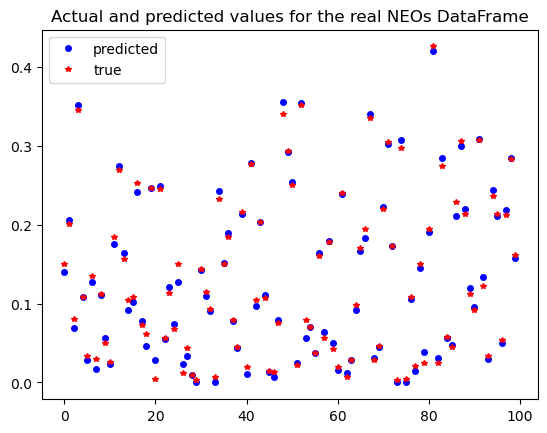

In [27]:
plt.plot(predictions[:100],'bo',markersize=4)
plt.plot(target[:100],'r*',markersize=4)
plt.legend(['predicted','true'],loc='upper left')
plt.title("Actual and predicted values for the real NEOs DataFrame")
plt.show()

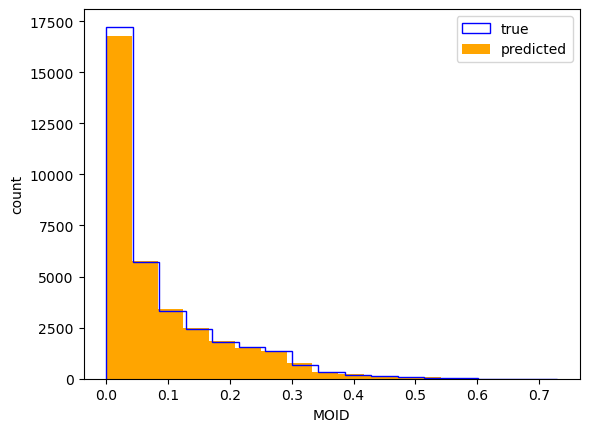

In [28]:
#Distribution of the MOID and predicted MOID
num_bins=math.ceil(math.log2(len(target))+1) #Sturges rule
plt.hist(target,bins=num_bins,color='orange')
plt.hist(predictions,bins=num_bins,color='blue',histtype='step')
plt.xlabel('MOID')
plt.ylabel('count')
plt.legend(['true','predicted'],loc='upper right')
plt.show()

In [29]:
target_binary, predictions_binary = np.zeros_like(target),np.zeros_like(predictions)
for el in range(len(target)):
    if (target[el]>0.05):
        target_binary[el]=1
    if (predictions[el]>0.05):
        predictions_binary[el]=1

In [30]:
tp=np.count_nonzero((target_binary==1)&(predictions_binary==1))
tn=np.count_nonzero((target_binary==0)&(predictions_binary==0))
fp=np.count_nonzero((target_binary==0)&(predictions_binary==1))
fn=np.count_nonzero((target_binary==1)&(predictions_binary==0))
print("True positives:", tp)
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)

True positives: 15859
True negatives: 17822
False positives: 469
False negatives: 714


In [31]:
acc=(tp+tn)/len(target) #accuracy
p=tp/(tp+fp) #precision
r=tp/(tp+fn) #recall
fpr=fp/(tn+fp) #false positive rate
f1=2*p*r/(p+r) #F1-score
print("Accuracy:", acc)
print("Precision:", p)
print("Recall:", r)
print("False positive rate:", fpr)
print("F1-score:", f1)

Accuracy: 0.9660681505277651
Precision: 0.9712763351298384
Recall: 0.956917878477041
False positive rate: 0.02564102564102564
F1-score: 0.9640436460897847


In [32]:
roc_auc_score(target_binary,predictions)

0.9951386031748715

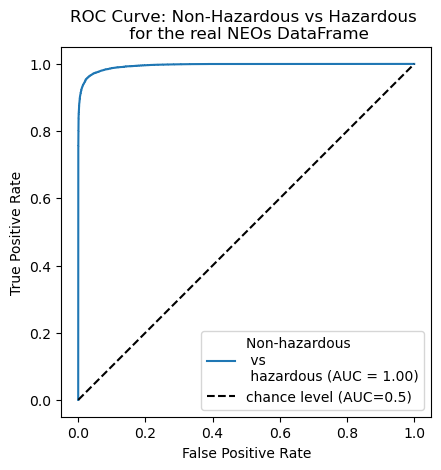

In [33]:
RocCurveDisplay.from_predictions(target_binary, predictions, name="Non-hazardous \n vs \n hazardous")
plt.plot([0,1],[0,1],"k--",label="chance level (AUC=0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Non-Hazardous vs Hazardous \n for the real NEOs DataFrame")
plt.legend(loc='lower right')
plt.show()

In [34]:
#See the asteroids with the highest absolute error:
abs_errors=np.zeros_like(target)
for el in range(len(target)):
    abs_errors[el]=np.absolute(target[el]-predictions[el])

In [35]:
ind=np.argpartition(abs_errors,-10)[-10:] #indices of the 10 largest values in abs_errors

In [36]:
top10_df=df.iloc[ind,:] #extract the rows corresponding to the indices in ind
top10_df['predicted_moid']=predictions[ind]
top10_df['abs_error']=abs_errors[ind]

/tmp/ipykernel_319274/3456925052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['predicted_moid']=predictions[ind]
/tmp/ipykernel_319274/3456925052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['abs_error']=abs_errors[ind]


In [37]:
top10_df.sort_values(by=['abs_error'],ascending=False)

spkid pha      H  epoch_mjd       a       e      i      om       w  \
33682  54414533   Y  19.51      60400  4.6340  0.7999  13.91   67.26  136.58   
24321  54087802   N  18.58      60400  2.1290  0.9332  55.90  238.69   18.88   
2439   20495021   N  22.70      60400  1.2710  0.0331   4.05    0.89   96.75   
10166   3640993   N  17.16      60400  4.4470  0.8338  29.38  129.67  357.31   
8206    3557637   N  23.51      55605  4.8160  0.7701  17.30  333.33  213.55   
33851  54416579   N  21.50      60400  4.6440  0.7610  25.48  269.26  160.46   
16409   3778084   N  24.50      60400  0.8945  0.1376  20.03  298.28  186.15   
18119   3803895   N  22.14      60400  0.8102  0.5883  22.06   14.38  354.84   
789    20164294   N  20.45      60400  0.6175  0.4546   2.95  211.16    5.42   
19446   3837721   N  25.50      60400  0.7452  0.3518   0.32  182.18   98.90   

           ma      moid  predicted_moid  abs_error  
33682  335.88  0.024900        0.091175   0.066275  
24321   79.02  0.282000        0.344930   0.062930  
2439    59.20  0.258000        0.198207   0.059793  
10166   59.30  0.245000        0.186045   0.058955  
8206   356.06  0.162000        0.220725   0.058725  
33851   12.08  0.148000        0.202440   0.054440  
16409  141.05  0.000653        0.053918   0.053265  
18119  277.10  0.181000        0.129120   0.051880  
789     88.23  0.094100        0.042884   0.051216  
19446  239.07  0.004890        0.055066   0.050176

In [38]:
#Now the idea is to change the threshold 0.05, setting it for example to threshold=0.06, and see how the true positives etc. change
threshold=0.06
pred_binary_new=np.zeros_like(target)
for el in range(len(target)):
    if (predictions[el]>threshold): #I will monitor with classical methods all the asteroids with predicted MOID <=0.06
        pred_binary_new[el]=1

In [39]:
print("Number of asteroids to be tested with classical methods, for that value of the threshols:", np.count_nonzero(predictions<=threshold))
print("Number of asteroids with MOID<=0.05:",np.count_nonzero(target<=0.05))

Number of asteroids to be tested with classical methods, for that value of the threshols: 20023
Number of asteroids with MOID<=0.05: 18291


In [40]:
tp=np.count_nonzero((target_binary==1)&(pred_binary_new==1))
tn=np.count_nonzero((target_binary==0)&(pred_binary_new==0))
fp=np.count_nonzero((target_binary==0)&(pred_binary_new==1))
fn=np.count_nonzero((target_binary==1)&(pred_binary_new==0))
print("True positives:", tp)
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)

True positives: 14765
True negatives: 18215
False positives: 76
False negatives: 1808


In [41]:
acc=(tp+tn)/len(target) #accuracy
p=tp/(tp+fp) #precision
r=tp/(tp+fn) #recall
fpr=fp/(tn+fp) #false positive rate
f1=2*p*r/(p+r) #F1-score
print("Accuracy:", acc)
print("Precision:", p)
print("Recall:", r)
print("False positive rate:", fpr) #this modification reduces drastically the FPR
print("F1-score:", f1)

Accuracy: 0.9459614502065168
Precision: 0.9948790512768682
Recall: 0.8909068967597901
False positive rate: 0.004155048931168334
F1-score: 0.9400267396702107


In [42]:
ind_new=(target_binary==0)&(pred_binary_new==1)

In [43]:
df_new=df.iloc[ind_new,:]
df_new['predicted_moid']=predictions[ind_new]
df_new['abs_error']=abs_errors[ind_new]
df_new

/tmp/ipykernel_319274/4044024848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['predicted_moid']=predictions[ind_new]
/tmp/ipykernel_319274/4044024848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['abs_error']=abs_errors[ind_new]


spkid pha      H  epoch_mjd       a       e      i      om       w  \
677    20162116   Y  19.54      60400  1.9160  0.5584   7.11  114.18  331.43   
890    20202683   Y  19.78      60400  0.6371  0.5624   3.44  193.26   56.42   
2034   20452376   Y  19.97      60400  1.7600  0.4937  16.55   82.37  331.71   
2407   20488789   Y  19.13      60400  1.4510  0.6886  38.23   94.05  104.03   
2658   20516454   N  18.65      60400  2.6630  0.7639  29.33  190.47  105.69   
...         ...  ..    ...        ...     ...     ...    ...     ...     ...   
32328  54374822   N  23.96      60400  0.9413  0.2846  21.07  283.04  134.07   
33630  54406861   N  22.52      60400  0.8561  0.4503  33.15  228.58   39.37   
33636  54407112   N  26.29      60400  0.8843  0.1561   7.24   65.41  190.19   
33682  54414533   Y  19.51      60400  4.6340  0.7999  13.91   67.26  136.58   
34822  54439420   N  25.16      60400  0.9180  0.1544   9.66   50.30  355.84   

           ma    moid  predicted_moid  abs_error  
677    193.35  0.0467        0.060036   0.013336  
890    229.73  0.0439        0.079752   0.035852  
2034   206.05  0.0472        0.062537   0.015337  
2407   336.11  0.0414        0.062715   0.021315  
2658   114.58  0.0500        0.065425   0.015425  
...       ...     ...             ...        ...  
32328  181.90  0.0496        0.062216   0.012616  
33630  277.60  0.0437        0.063635   0.019935  
33636  311.98  0.0308        0.061191   0.030391  
33682  335.88  0.0249        0.091175   0.066275  
34822  137.57  0.0483        0.065098   0.016798  

[76 rows x 13 columns]

In [44]:
df_new.sort_values(by=['abs_error'],ascending=False).head(10)

spkid pha      H  epoch_mjd       a       e      i      om       w  \
33682  54414533   Y  19.51      60400  4.6340  0.7999  13.91   67.26  136.58   
6647    3444376   N  25.10      60400  1.0210  0.1399   1.02   24.73  195.03   
28936  54278256   N  23.31      59706  2.8080  0.9576  42.86  226.93  213.04   
23452  54051248   N  24.20      60400  1.0430  0.2337   1.16  216.70    2.99   
31198  54340154   N  23.67      60400  0.9775  0.2061   1.54  187.80  173.43   
4407    3182169   N  23.74      60400  1.0850  0.1756   1.50  143.81    1.97   
19542   3837918   N  24.10      60400  0.9777  0.1767   2.54   96.51  163.83   
25983  54147140   N  28.28      60400  0.8896  0.1564   5.82  234.62  184.32   
14165   3748472   N  26.90      60400  1.0060  0.1655   2.12  223.95  198.79   
23260  54049796   N  26.90      60400  0.9006  0.1853  20.03  303.50  165.03   

           ma    moid  predicted_moid  abs_error  
33682  335.88  0.0249        0.091175   0.066275  
6647   179.96  0.0163        0.063510   0.047210  
28936    8.65  0.0414        0.088165   0.046765  
23452  223.88  0.0198        0.065217   0.045417  
31198  183.23  0.0239        0.068303   0.044403  
4407   275.99  0.0232        0.067033   0.043833  
19542   10.43  0.0378        0.081507   0.043707  
25983  328.81  0.0171        0.060061   0.042961  
14165   92.53  0.0336        0.075980   0.042380  
23260  311.17  0.0433        0.084399   0.041099